In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparseCoder

In [2]:

def ricker_function(resolution, center, width):
    """Discrete sub-sampled Ricker (Mexican hat) wavelet"""
    x = np.linspace(0, resolution - 1, resolution)
    x = (
        (2 / (np.sqrt(3 * width) * np.pi**0.25))
        * (1 - (x - center) ** 2 / width**2)
        * np.exp(-((x - center) ** 2) / (2 * width**2))
    ) 
    return x


def ricker_matrix(width, resolution, n_components):
    """Dictionary of Ricker (Mexican hat) wavelets"""
    centers = np.linspace(0, resolution - 1, n_components)
    D = np.empty((n_components, resolution))
    for i, center in enumerate(centers):
        D[i] = ricker_function(resolution, center, width)
    D /= np.sqrt(np.sum(D**2, axis=1))[:, np.newaxis]
    return D

In [8]:
rng = np.random.RandomState(42)

resolution = 1024  # 1000 samples
subsampling = 2  # subsampling factor
width = 100
n_components = resolution // subsampling

# Compute a wavelet dictionary
D_multi = np.r_[
    tuple(
        ricker_matrix(width=w, resolution=resolution, n_components= n_components // 2)
        for w in np.power(np.linspace(2,20,20),2)
    )
]

time_consume = np.linspace(0, resolution - 1, resolution)/10

In [31]:
feature = D_multi.shape[0]
idx = np.arange(feature)
k   = 120
true_coef = 8 * np.exp(-idx / 50)
# true_coef = 3.5 * rng.rand(feature)
ri = rng.choice(feature, k, replace=False)
mask = np.ones(feature, dtype=bool)
mask[ri] = False
true_coef[mask] = 0

In [32]:
seismic_data = D_multi.T.dot(true_coef)

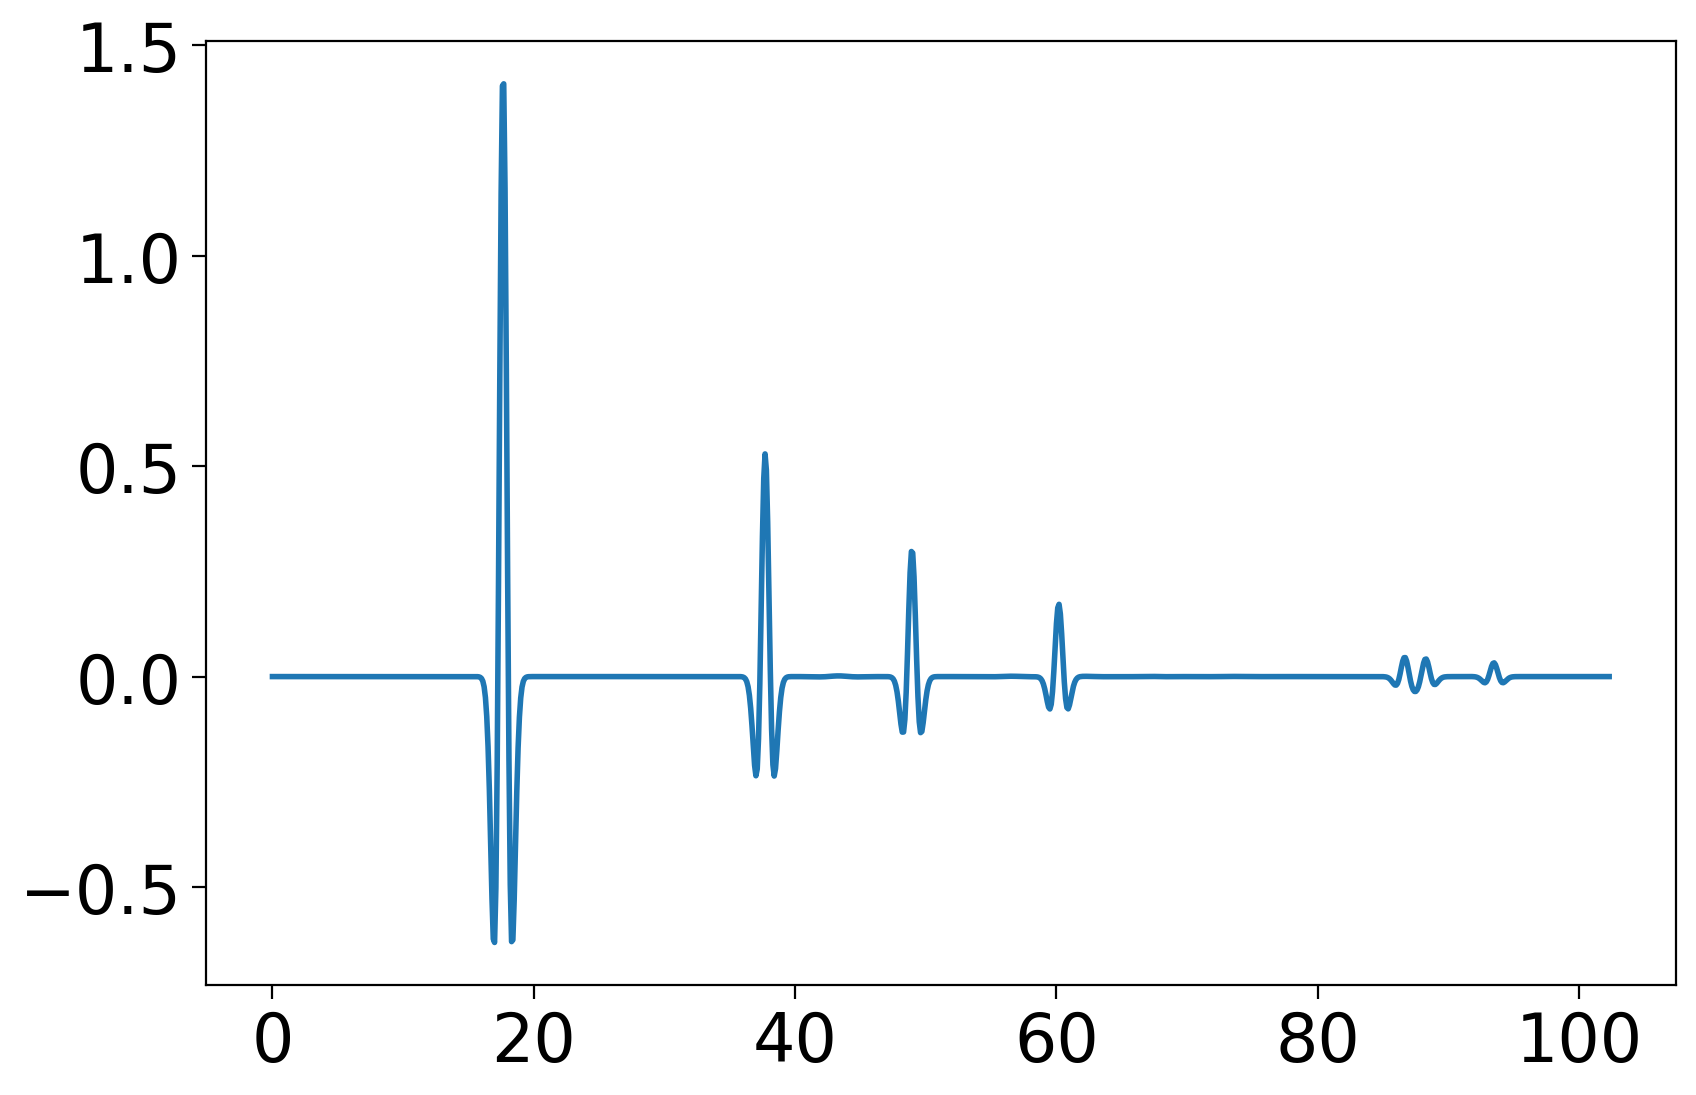

In [33]:
plt.plot(time_consume, seismic_data)

In [34]:
print(D_multi.shape)

(5120, 1024)
